In [15]:
import pandas as pd

# cargamos el dataset
df = pd.read_csv('better_dataset.csv')

# mostramos las primeras filas
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male
0,3.0,0,0,0,0,95.12,18.0,0,0,0,0,1,1,0,0,0,0,1
1,58.0,1,0,1,1,87.96,39.2,0,0,1,0,0,0,0,1,0,0,1
2,8.0,0,0,0,1,110.89,17.6,0,0,1,0,0,1,0,0,0,1,0
3,70.0,0,0,1,0,69.04,35.9,0,0,1,0,0,0,1,0,0,1,0
4,52.0,0,0,1,1,77.59,17.7,0,0,1,0,0,0,1,0,0,1,0


In [16]:
# mostramos información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5516 entries, 0 to 5515
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5516 non-null   float64
 1   hypertension                    5516 non-null   int64  
 2   heart_disease                   5516 non-null   int64  
 3   ever_married                    5516 non-null   int64  
 4   Residence_type                  5516 non-null   int64  
 5   avg_glucose_level               5516 non-null   float64
 6   bmi                             5516 non-null   float64
 7   stroke                          5516 non-null   int64  
 8   work_type_Govt_job              5516 non-null   int64  
 9   work_type_Private               5516 non-null   int64  
 10  work_type_Self-employed         5516 non-null   int64  
 11  work_type_children              5516 non-null   int64  
 12  smoking_status_Unknown          55

================== RandomForest ==================
Accuracy: 0.8559782608695652
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       947
           1       0.49      0.33      0.40       157

    accuracy                           0.86      1104
   macro avg       0.69      0.64      0.66      1104
weighted avg       0.84      0.86      0.84      1104



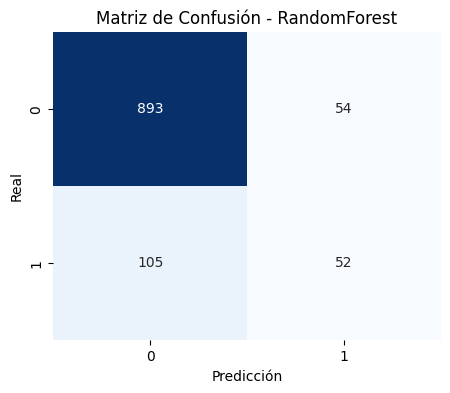

================== XGBoost ==================
Accuracy: 0.8586956521739131
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       947
           1       0.50      0.39      0.44       157

    accuracy                           0.86      1104
   macro avg       0.70      0.67      0.68      1104
weighted avg       0.85      0.86      0.85      1104



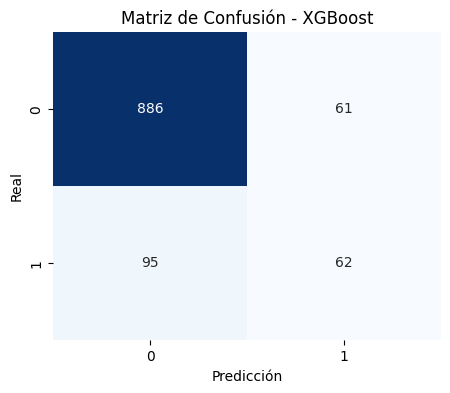

================== SVM ==================
Accuracy: 0.7409420289855072
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.73      0.83       947
           1       0.33      0.82      0.47       157

    accuracy                           0.74      1104
   macro avg       0.65      0.77      0.65      1104
weighted avg       0.87      0.74      0.78      1104



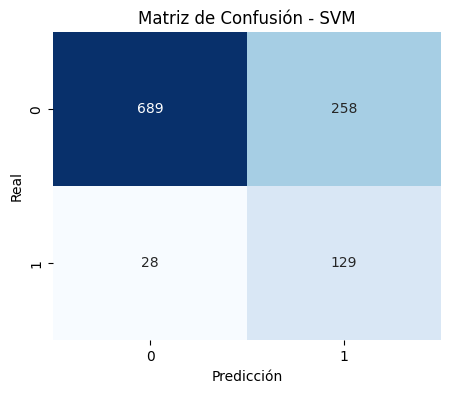

================== LogisticRegression ==================
Accuracy: 0.8442028985507246
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       947
           1       0.43      0.32      0.37       157

    accuracy                           0.84      1104
   macro avg       0.66      0.62      0.64      1104
weighted avg       0.83      0.84      0.83      1104



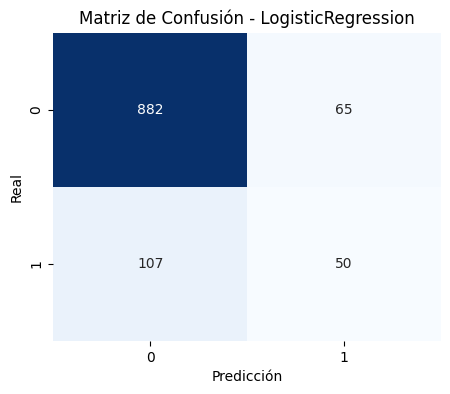

================== KNN ==================
Accuracy: 0.7518115942028986
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       947
           1       0.32      0.66      0.43       157

    accuracy                           0.75      1104
   macro avg       0.62      0.71      0.64      1104
weighted avg       0.84      0.75      0.78      1104



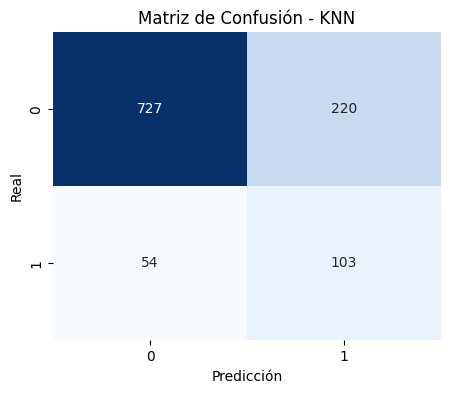

================== GradientBoosting ==================
Accuracy: 0.8614130434782609
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       947
           1       0.52      0.42      0.46       157

    accuracy                           0.86      1104
   macro avg       0.71      0.68      0.69      1104
weighted avg       0.85      0.86      0.86      1104



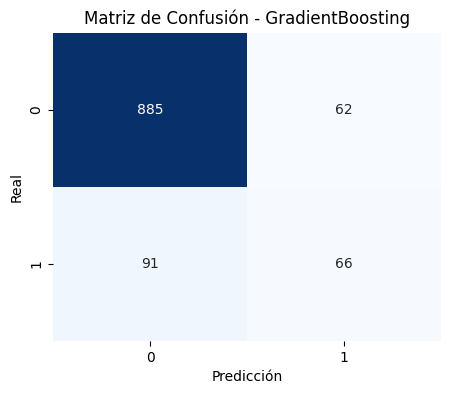

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score

# dividimos el dataset en características (X) y target (y)
X = df.drop(columns=['stroke'])
y = df['stroke']

# dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# usamos SMOTE para balancear el dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# definimos los modelos a utilizar
models = {
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42),
    "LogisticRegression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# entrenamos y evaluamos cada modelo con métricas
metrics_list = []

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"================== {name} ==================")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    metrics_list.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    # mostramos matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

In [18]:
# mostramos tabla ordenada por F1 Score
metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
print("================== Comparación de modelos ==================")
print(metrics_df)

================== Comparación de modelos ==================
                Model  Accuracy  Precision    Recall  F1 Score
0                 SVM  0.740942   0.333333  0.821656  0.474265
1    GradientBoosting  0.861413   0.515625  0.420382  0.463158
2             XGBoost  0.858696   0.504065  0.394904  0.442857
3                 KNN  0.751812   0.318885  0.656051  0.429167
4        RandomForest  0.855978   0.490566  0.331210  0.395437
5  LogisticRegression  0.844203   0.434783  0.318471  0.367647


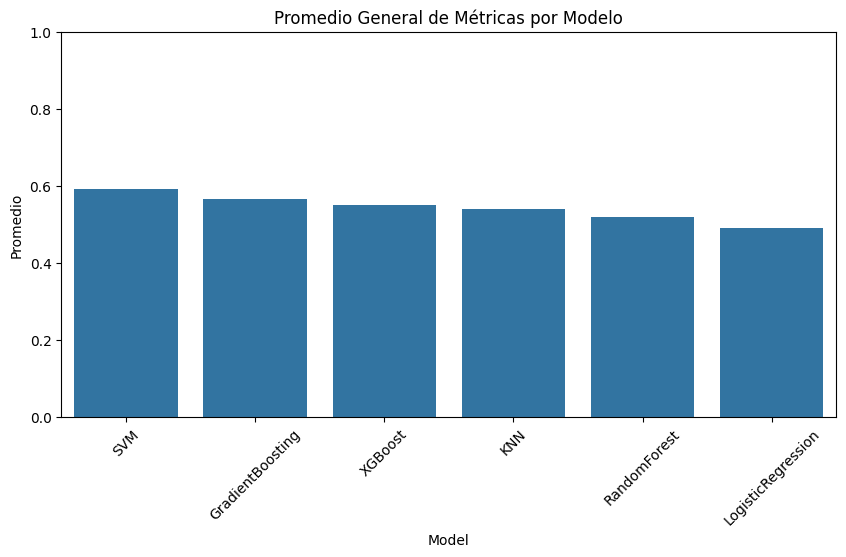

In [19]:
# añadimos nueva columna con la media de las métricas principales en la tabla de comparación
metrics_df['Average'] = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean(axis=1).round(3)

# ordenamos por la media
metrics_df = metrics_df.sort_values(by='Average', ascending=False).reset_index(drop=True)

# mostramos la media en un barplot
plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df, x='Model', y='Average')
plt.title("Promedio General de Métricas por Modelo")
plt.ylim(0, 1)
plt.ylabel("Promedio")
plt.xticks(rotation=45)
plt.show()


Elejimos el modelo SVM por tener unas métricas generales mejores. Procedemos a optimizarlo.

In [20]:
from sklearn.model_selection import GridSearchCV

# definimos los hiperparámetros a probar
param_grid = {
    'C': [1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale']
}

svc = SVC(probability=True, class_weight='balanced', random_state=42)

grid_search = GridSearchCV(svc, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# modelo con mejores hiperparámetros
best_svm = grid_search.best_estimator_

# evaluamos
y_pred_best = best_svm.predict(X_test)
print("Best SVM Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best SVM Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best SVM Accuracy: 0.7690217391304348
Best SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85       947
           1       0.36      0.77      0.49       157

    accuracy                           0.77      1104
   macro avg       0.65      0.77      0.67      1104
weighted avg       0.87      0.77      0.80      1104



Con GridSearch hemos mejorado las métricas del modelo SVM, está detectando más correctamente los casos de stroke sin comprometer demasiado la clase negativa. La métrica F1-score para la clase minoritaria mejoró, que es lo más importante en este caso.

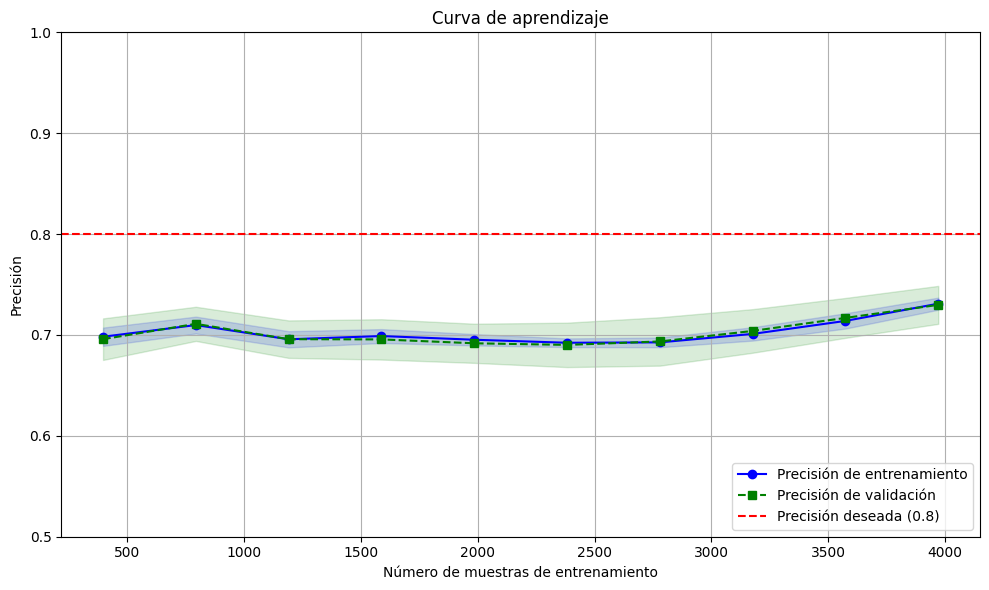

In [21]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_svm,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    n_jobs=-1,
    scoring='accuracy'
)

# Cálculo de medias y desviaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Crear la curva
plt.figure(figsize=(10, 6))

# Precisión de entrenamiento
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Precisión de entrenamiento')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.15)

# Precisión de validación
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', label='Precisión de validación')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.15)

# Línea horizontal de precisión deseada
desired_accuracy = 0.80
plt.axhline(y=desired_accuracy, color='red', linestyle='--', linewidth=1.5, label=f'Precisión deseada ({desired_accuracy})')

# Estética del gráfico
plt.title('Curva de aprendizaje')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()
